In [1]:
import pandas as pd
from sklearn.utils import shuffle
import numpy as np
data_set_path="data_set.csv"
df = pd.read_csv(data_set_path)
df = shuffle(df)

In [2]:
df = df[df.target != 0]
df = df[df.target <220]
df['x_ratio']= df['w_values']/df['x_resol']
df['y_ratio']= df['h_values']/df['y_resol']
df = df[['x_ratio','y_ratio','target']]
df.target=df.target/220.
#df.target=df.target/df.target.max()
df.head()

,x_ratio,y_ratio,target
671,0.693750,0.925000,0.127273
1565,0.685937,0.914583,0.113636
342,0.210227,0.256944,0.490909
2304,0.206250,0.275000,0.481818
1301,0.123438,0.164583,0.754545


In [3]:
x=df.drop(['target'],1)
y=df['target']
predict_data_size=120
x_prediction=x[-predict_data_size:]
y_prediction=y[-predict_data_size:]
x=x[:-predict_data_size+1]
y=y[:-predict_data_size+1]

In [4]:
x=np.array(x)
y=np.array(y)
y=y.reshape((y.shape[0],1))
print(x.shape,y.shape)

(2223, 2) (2223, 1)


In [5]:
from tensorflow.keras import datasets, layers, models
model = models.Sequential()#neural network model
model.add(layers.Dense(units=2, input_shape=[2]))#first input layer with 943 nods but 1 input
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(1, activation='relu'))#output layer with 1 nod to show the result
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_squared_error'])#mean squared error method and adam optimizer(i allways work with adam xD)
model.fit(x, y,epochs=100,validation_split=0.2)#training the model for 50 times

/home/yosr/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/yosr/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/yosr/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/yosr/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

Train on 1778 samples, validate on 445 samples
Epoch 1/100
1778/1778 [==============================] - 1s 545us/sample - loss: 0.3479 - mean_squared_error: 0.1795 - val_loss: 0.2590 - val_mean_squared_error: 0.0986
Epoch 2/100
1778/1778 [==============================] - 0s 57us/sample - loss: 0.2130 - mean_squared_error: 0.0757 - val_loss: 0.1233 - val_mean_squared_error: 0.0339
Epoch 3/100
1778/1778 [==============================] - 0s 59us/sample - loss: 0.1138 - mean_squared_error: 0.0267 - val_loss: 0.0723 - val_mean_squared_error: 0.0115
Epoch 4/100
1778/1778 [==============================] - 0s 52us/sample - loss: 0.0831 - mean_squared_error: 0.0152 - val_loss: 0.0553 - val_mean_squared_error: 0.0065
Epoch 5/100
1778/1778 [==============================] - 0s 49us/sample - loss: 0.0756 - mean_squared_error: 0.0126 - val_loss: 0.0471 - val_mean_squared_error: 0.0047
Epoch 6/100
1778/1778 [==============================] - 0s 58us/sample - loss: 0.0698 - mean_squared_error: 0.0

1778/1778 [==============================] - 0s 64us/sample - loss: 0.0556 - mean_squared_error: 0.0061 - val_loss: 0.0386 - val_mean_squared_error: 0.0029
Epoch 50/100
1778/1778 [==============================] - 0s 54us/sample - loss: 0.0552 - mean_squared_error: 0.0058 - val_loss: 0.0384 - val_mean_squared_error: 0.0030
Epoch 51/100
1778/1778 [==============================] - 0s 58us/sample - loss: 0.0569 - mean_squared_error: 0.0061 - val_loss: 0.0374 - val_mean_squared_error: 0.0031
Epoch 52/100
1778/1778 [==============================] - 0s 57us/sample - loss: 0.0567 - mean_squared_error: 0.0061 - val_loss: 0.0395 - val_mean_squared_error: 0.0034
Epoch 53/100
1778/1778 [==============================] - 0s 57us/sample - loss: 0.0547 - mean_squared_error: 0.0057 - val_loss: 0.0365 - val_mean_squared_error: 0.0030
Epoch 54/100
1778/1778 [==============================] - 0s 54us/sample - loss: 0.0580 - mean_squared_error: 0.0064 - val_loss: 0.0378 - val_mean_squared_error: 0.0029

1778/1778 [==============================] - 0s 65us/sample - loss: 0.0573 - mean_squared_error: 0.0062 - val_loss: 0.0405 - val_mean_squared_error: 0.0034
Epoch 98/100
1778/1778 [==============================] - 0s 57us/sample - loss: 0.0570 - mean_squared_error: 0.0064 - val_loss: 0.0423 - val_mean_squared_error: 0.0032
Epoch 99/100
1778/1778 [==============================] - 0s 79us/sample - loss: 0.0566 - mean_squared_error: 0.0063 - val_loss: 0.0369 - val_mean_squared_error: 0.0029
Epoch 100/100
1778/1778 [==============================] - 0s 87us/sample - loss: 0.0569 - mean_squared_error: 0.0063 - val_loss: 0.0376 - val_mean_squared_error: 0.0029


In [6]:
x_prediction=np.array(x_prediction)
y_prediction=np.array(y_prediction)

In [8]:
results=model.predict(x_prediction)
distance=results*220

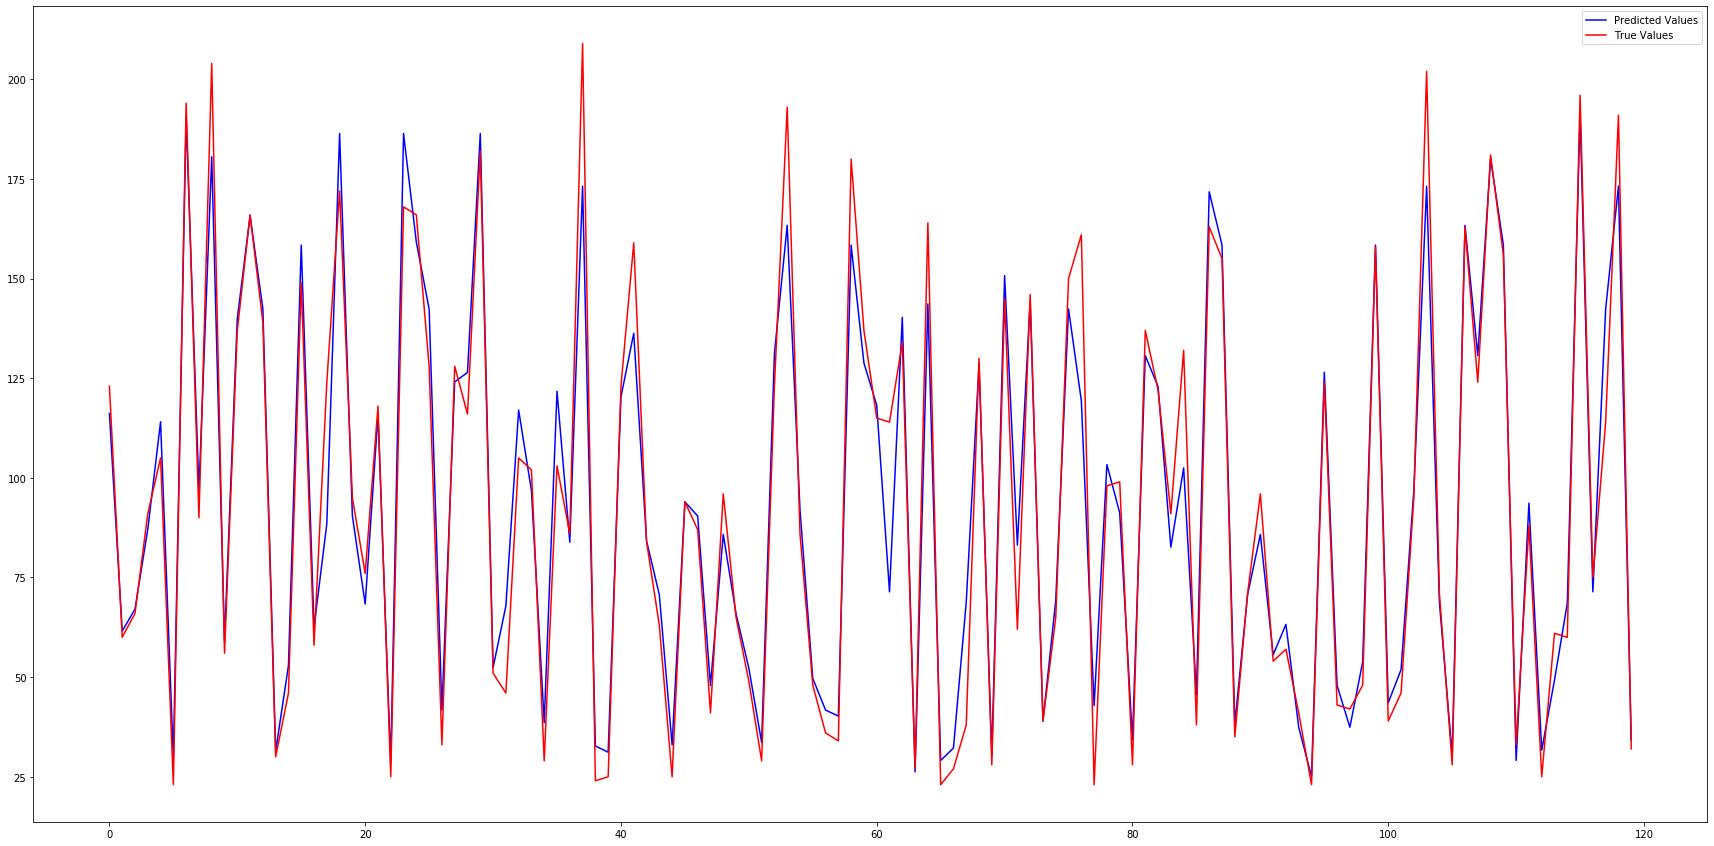

In [10]:
import matplotlib.pyplot as plt
t=range(predict_data_size)
plt.figure(figsize=(30,15))
plt.plot(t, distance, 'b') 
plt.plot(t, y_prediction*220, 'r') 
plt.legend(['Predicted Values','True Values'])
plt.show()

In [11]:
model.save('MLP_model.h5')